# Particle and gas velocity difference

In [68]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import torch
import torch.nn as nn
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm

In [170]:
vg_in = sorted(glob.glob('./gas-vel/TurbPar.out2.0013[5-9].hdf5-vel.npy'))
vp_out = sorted(glob.glob('./out/TurbPar.out2.0013[5-9].hdf5-vp_out.npy'))
vp_tgt = sorted(glob.glob('./tgt/TurbPar.out2.0013[5-9].hdf5-vp.npy'))
len(vg_in),len(vp_out),len(vp_tgt)

(5, 5, 5)

In [171]:
def read_npy(paths,sep=2):
    npys = []
    for i,path in enumerate(paths):
        npys.append(np.load(path))
        if i % sep == 0:
            print(f'{i}:Loading {path} {npys[-1].shape}')
    print(f'Total of {len(npys)} files loaded')
    return npys


In [172]:
npy_vg = read_npy(vg_in)
npy_vp_out = read_npy(vp_out)
npy_vp_tgt = read_npy(vp_tgt)

0:Loading ./gas-vel/TurbPar.out2.00135.hdf5-vel.npy (3, 256, 256, 256)
2:Loading ./gas-vel/TurbPar.out2.00137.hdf5-vel.npy (3, 256, 256, 256)
4:Loading ./gas-vel/TurbPar.out2.00139.hdf5-vel.npy (3, 256, 256, 256)
Total of 5 files loaded
0:Loading ./out/TurbPar.out2.00135.hdf5-vp_out.npy (3, 256, 256, 256)
2:Loading ./out/TurbPar.out2.00137.hdf5-vp_out.npy (3, 256, 256, 256)
4:Loading ./out/TurbPar.out2.00139.hdf5-vp_out.npy (3, 256, 256, 256)
Total of 5 files loaded
0:Loading ./tgt/TurbPar.out2.00135.hdf5-vp.npy (3, 256, 256, 256)
2:Loading ./tgt/TurbPar.out2.00137.hdf5-vp.npy (3, 256, 256, 256)
4:Loading ./tgt/TurbPar.out2.00139.hdf5-vp.npy (3, 256, 256, 256)
Total of 5 files loaded


In [178]:
def rel_velc(vg,vd):
    return vd - vg # +ve means dust faster than gas and vice versa

In [180]:
frame = 0

In [181]:
rel_out = rel_velc(npy_vg[frame],npy_vp_out[frame])
rel_tgt = rel_velc(npy_vg[frame],npy_vp_tgt[frame])

In [182]:
np.min(rel_out),np.max(rel_out),np.min(rel_tgt),np.max(rel_tgt)

(-0.42836288, 0.38243338, -0.44716766, 0.47465765)

In [273]:
def plot_compare(out,tgt,cmap='viridis',chn=0):
    #eps = np.unique(out)[1]
    #print('Epsilon:', eps)
    out_slice = out[chn,:,:,out.shape[-1]//2]
    tgt_slice = tgt[chn,:,:,tgt.shape[-1]//2]
    print(out_slice.shape, tgt_slice.shape)
    
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,18))
    
    q1,q3 = np.quantile(out_slice,[0.25,0.75])
    q_min,q_max = np.min(out_slice), np.max(tgt_slice)
    q_avg = 0.5*(np.abs(q3)+np.abs(q1))
    
    print('q1: ',q1,'; q3: ',q3)
    print('qmin: ',q_min,'; qmax: ',q_max)
    
    
    norm = colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                             vmin=-0.5, vmax=0.5, base=10)
    
    im=cm.ScalarMappable(norm=norm,cmap=cmap)
    axs[0].set_title(f'Out slice; Dimension: {out.shape}; chn: {chn}')
    axs[1].set_title(f'Tgt slice; Dimension: {tgt.shape}; chn: {chn}')
    axs[0].pcolormesh(out_slice,cmap=cmap,norm=norm)
    axs[1].pcolormesh(tgt_slice,cmap=cmap,norm=norm)
    
    fig.colorbar(im, ax=axs,orientation='horizontal')
    axs[0].set_aspect('equal')
    axs[1].set_aspect('equal')

# Direct comparision between vp_out and vp_tgt

## Channel 0 (vx)

(256, 256) (256, 256)
q1:  -0.08596671000123024 ; q3:  0.02524712961167097
qmin:  -0.32146376 ; qmax:  0.37901807


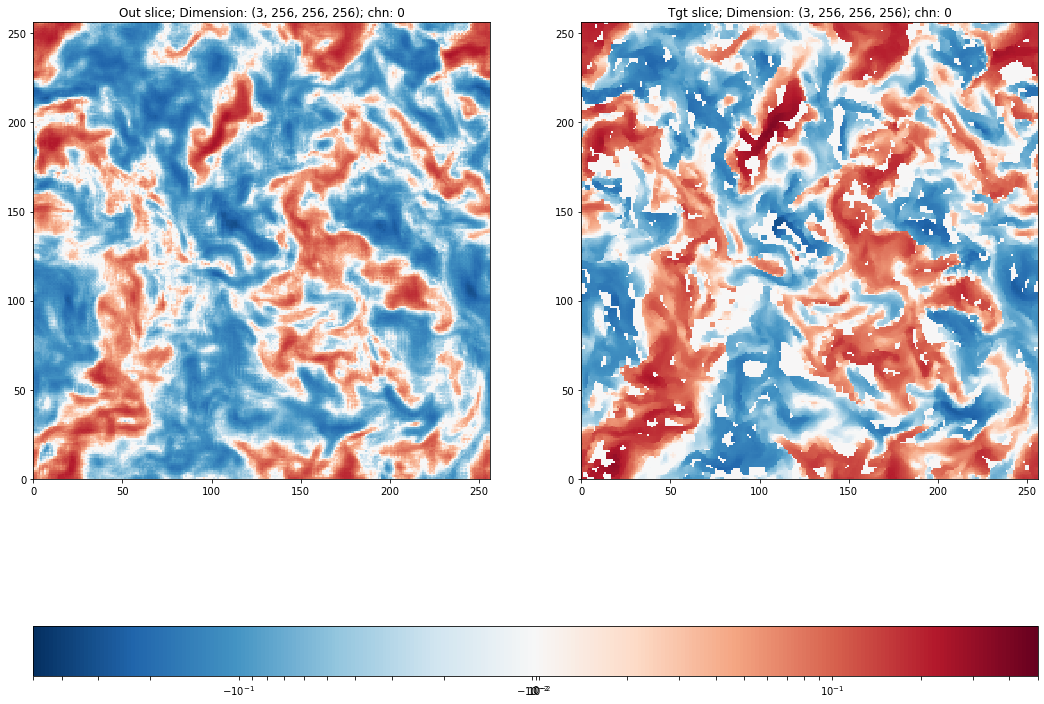

In [276]:
plot_compare(npy_vp_out[frame],npy_vp_tgt[frame],cmap='RdBu_r',chn=0)

## Channel 1 (vy)

(256, 256) (256, 256)
q1:  -0.03623123001307249 ; q3:  0.0714961551129818
qmin:  -0.29091498 ; qmax:  0.3331346


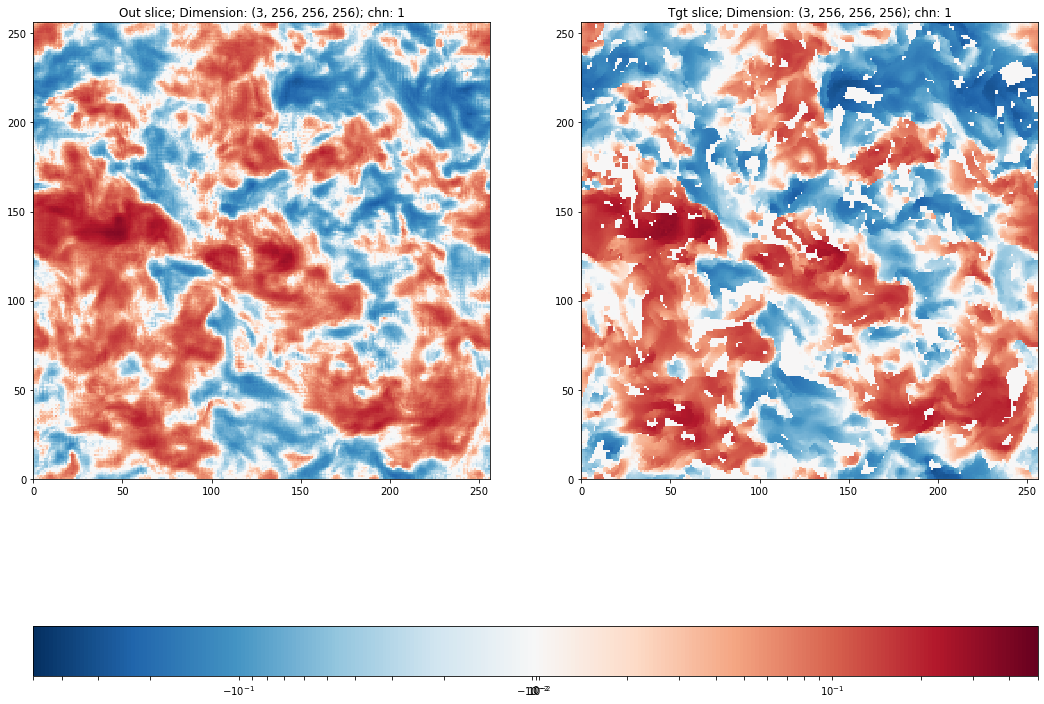

In [278]:
plot_compare(npy_vp_out[frame],npy_vp_tgt[frame],cmap='RdBu_r',chn=1)

## Channel 2 (vz)

(256, 256) (256, 256)
q1:  -0.06546063534915447 ; q3:  0.04347863048315048
qmin:  -0.3195034 ; qmax:  0.31502995


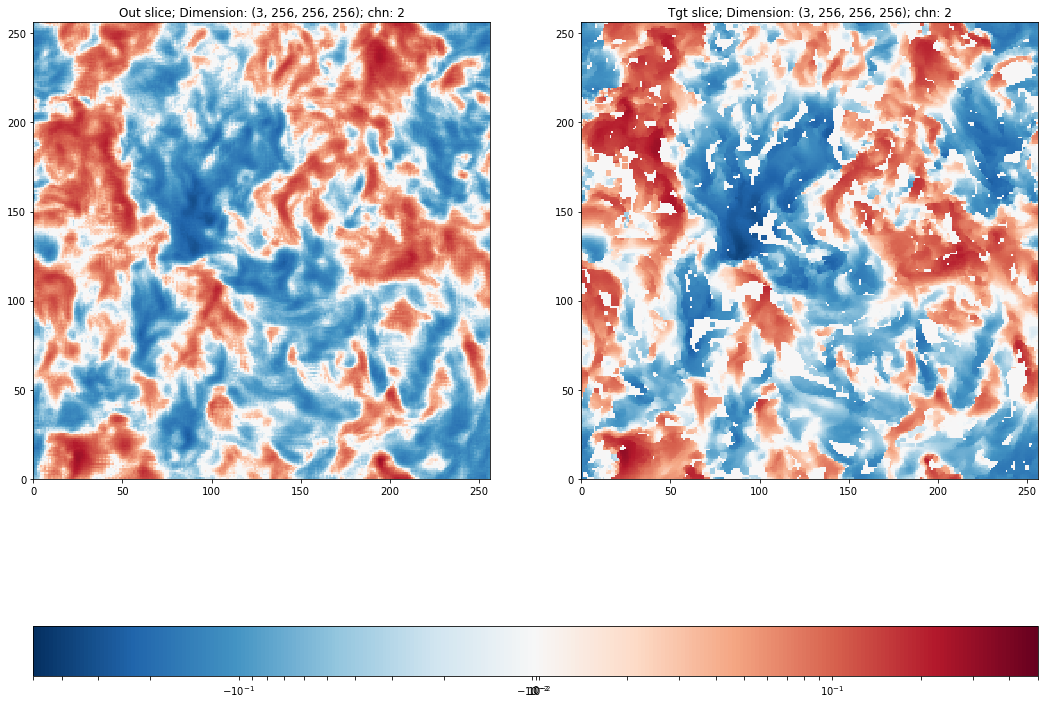

In [279]:
plot_compare(npy_vp_out[frame],npy_vp_tgt[frame],cmap='RdBu_r',chn=2)

# Relative velocities vp_out/tgt - v_g

## Channel 0 (vx)

(256, 256) (256, 256)
q1:  -0.05646228417754173 ; q3:  -5.490449257194996e-05
qmin:  -0.3256135 ; qmax:  0.43300912


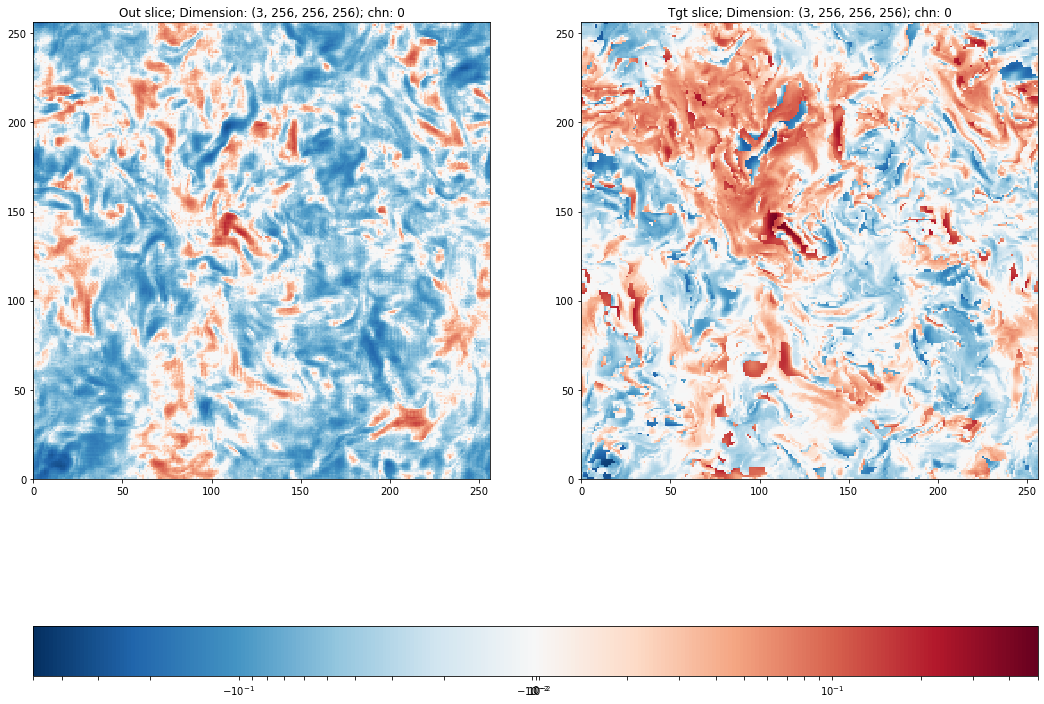

In [281]:
plot_compare(rel_out,rel_tgt,cmap='RdBu_r',chn=0)

## Channel 1 (vy)

(256, 256) (256, 256)
q1:  -0.014355884864926338 ; q3:  0.04250685125589371
qmin:  -0.20466831 ; qmax:  0.31250414


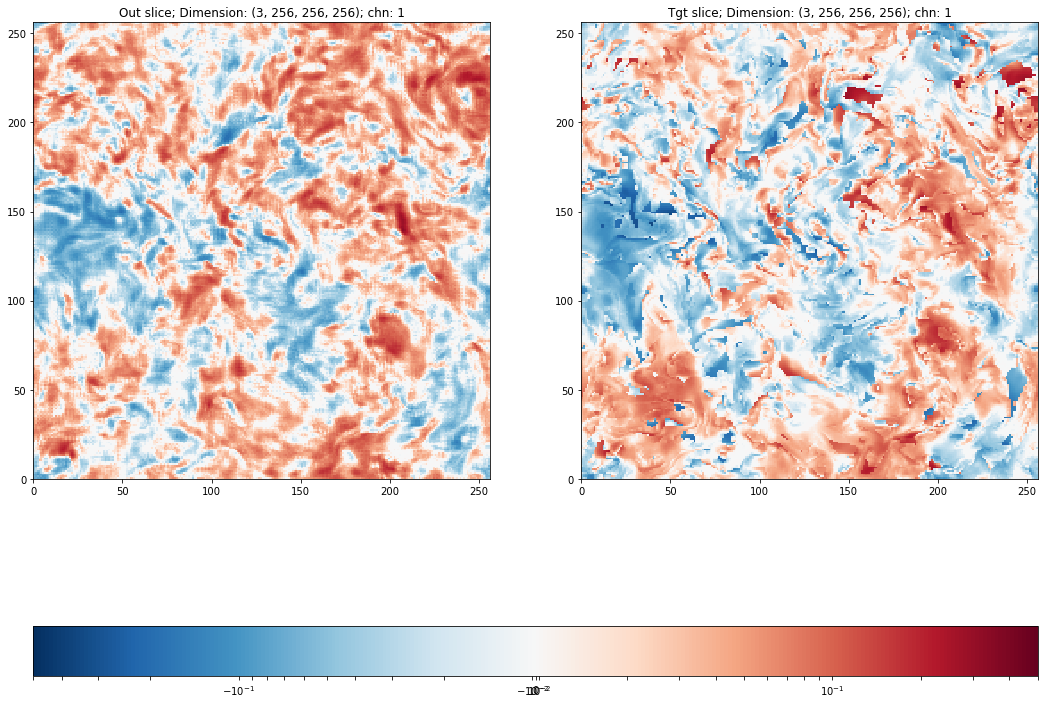

In [282]:
plot_compare(rel_out,rel_tgt,cmap='RdBu_r',chn=1)

## Channel 2 (vz)

(256, 256) (256, 256)
q1:  -0.028013937175273895 ; q3:  0.0242364639416337
qmin:  -0.2612862 ; qmax:  0.4728035


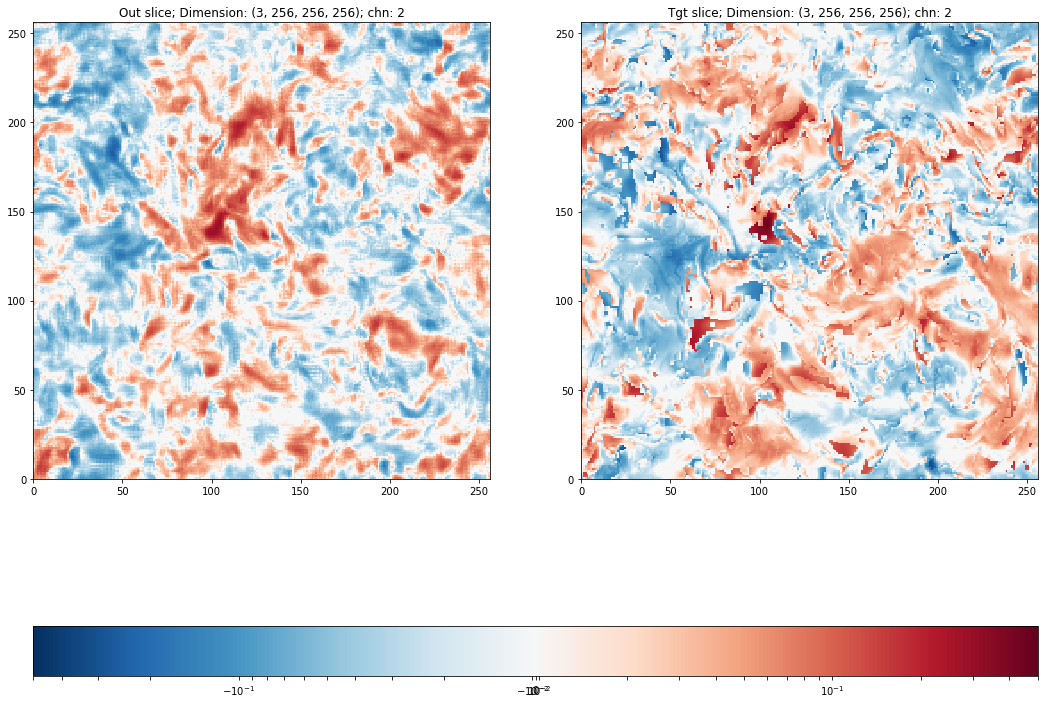

In [283]:
plot_compare(rel_out,rel_tgt,cmap='RdBu_r',chn=2)

# Distribution of velocities

Since the graph above seems to indicate that the network does not perform very well, maybe plotting the distribution will help us understand better what exactly goes wrong. Here we define the following distributions:

\begin{align*}
f_0(v)dv = \text{Probability of relative velocity } v_r \text{ to have values from} v \text{ to } v +dv
\end{align*}


In [235]:
def prob_den(arr,bins=100):
    den,edgs = np.histogram(rel_out,density=True,bins=bins)
    x,dx = 0.5*(edgs[1:]+edgs[:-1]),edgs[1:]-edgs[:-1]
    return (x,den,dx)

In [262]:
vrel_out,vden_out,_ = prob_den(rel_out)
vrel_tgt,vden_tgt,_ = prob_den(rel_tgt)

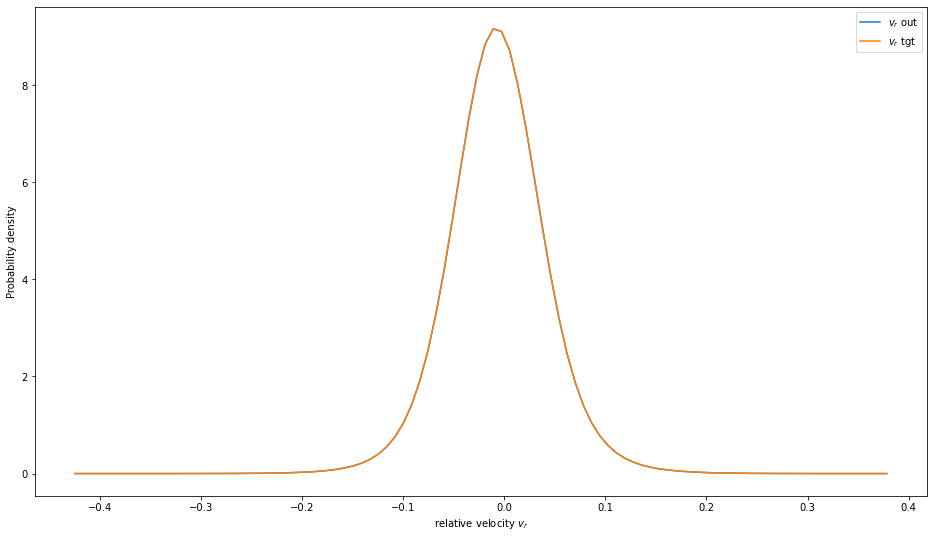

In [263]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
ax.plot(vrel_out,vden_out,label=r'$v_{r}$ out')
ax.plot(vrel_tgt,vden_tgt,label=r'$v_{r}$ tgt')
ax.set_xlabel(r'relative velocity $v_r$')
ax.set_ylabel(r'Probability density')
plt.legend()

It doesn't seems to reveal much. Maybe it's because as shown in the slice plots above, sometimes the out is larger than tgt and sometimes vice versa, so they even out